In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
combined_df = pd.read_csv('../features/combined_happiness_data.csv')
columns_to_use = ['happiness_score', 'family', 'freedom', 'generosity', 'GDP', 'life_expectancy', 'government_corruption']
df_model = combined_df[columns_to_use].dropna()
df_model['government_corruption'] = pd.to_numeric(df_model['government_corruption'], errors='coerce')
df_model = df_model.dropna()

In [37]:
X = df_model.drop('happiness_score', axis=1)
y = df_model['happiness_score']

# Train (70%) y test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.309824650958382
R^2 Score: 0.7518804887905026


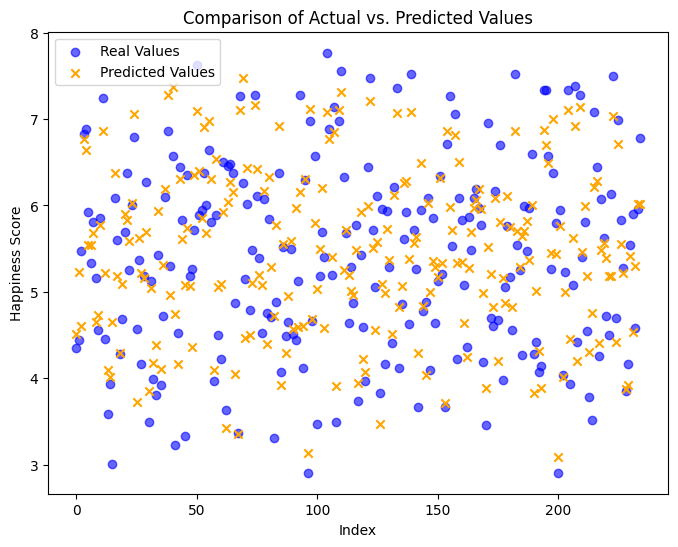

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Real Values', alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, color='orange', marker='x', label='Predicted Values')

plt.title('Comparison of Actual vs. Predicted Values')
plt.xlabel('Index')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()


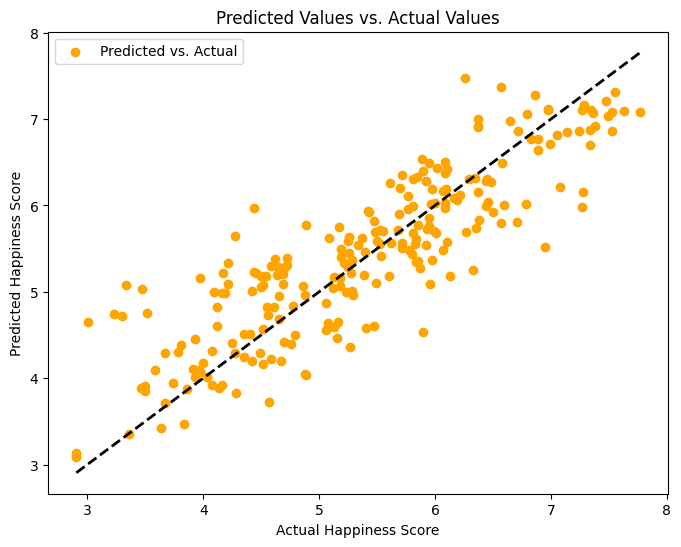

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='orange', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)

plt.title('Predicted Values vs. Actual Values')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.legend()
plt.show()
